In [28]:
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [8]:
#Recebendo a base de dados caso não possua no pc
#Escolha arbitraria da

if os.path.exists("ABEV.csv"):
    ambev = pd.read_csv("ABEV.csv", index_col=0)
else:
    ambev = yf.Ticker("ABEV")
    ambev = ambev.history(period="max")
    ambev.to_csv("ABEV.csv")

In [20]:
#Modificar Formato da data caso de erro

ambev

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-03-05 00:00:00-05:00,0.000000,0.198069,0.198069,0.198069,15000,0.0,0.0
1997-03-06 00:00:00-05:00,0.198069,0.198069,0.198069,0.198069,0,0.0,0.0
1997-03-07 00:00:00-05:00,0.198069,0.198069,0.198069,0.198069,0,0.0,0.0
1997-03-10 00:00:00-05:00,0.000000,0.214575,0.214575,0.214575,24000,0.0,0.0
1997-03-11 00:00:00-05:00,0.214575,0.214575,0.214575,0.214575,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-13 00:00:00-04:00,2.560000,2.570000,2.520000,2.530000,14407700,0.0,0.0
2024-03-14 00:00:00-04:00,2.540000,2.550000,2.520000,2.520000,10962000,0.0,0.0
2024-03-15 00:00:00-04:00,2.520000,2.530000,2.490000,2.500000,13812000,0.0,0.0


<Axes: xlabel='Date'>

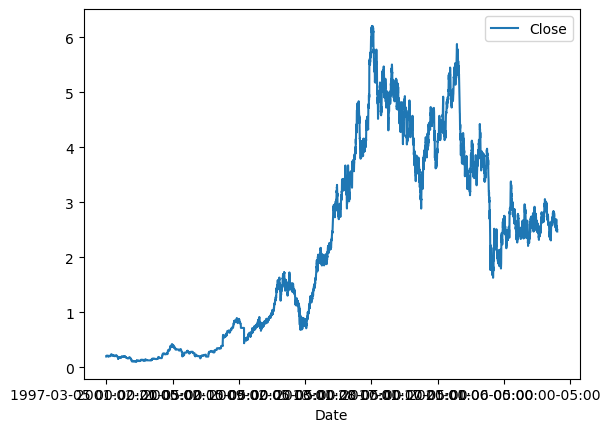

In [30]:
#Girar a legenda em 45°
ambev.plot.line(y="Close", use_index=True,)

In [31]:
#Deletando colunas
del ambev["Dividends"]
del ambev["Stock Splits"]

In [32]:
#Criando coluna amanhã
ambev["Tomorrow"] = ambev["Close"].shift(-1)

In [67]:
ambev

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2003-12-26 00:00:00-05:00,0.347645,0.347645,0.347645,0.347645,0,0.347645,0,1.000000,0.0,1.000000,0.0,1.016612,2.0,1.246966,14.0,1.319786,79.0
2003-12-29 00:00:00-05:00,0.347645,0.347645,0.347645,0.347645,0,0.347645,0,1.000000,0.0,1.000000,0.0,1.015353,2.0,1.244540,14.0,1.318860,79.0
2003-12-30 00:00:00-05:00,0.347645,0.347645,0.347645,0.347645,0,0.347645,0,1.000000,0.0,1.000000,0.0,1.014098,2.0,1.242124,14.0,1.317935,79.0
2003-12-31 00:00:00-05:00,0.347645,0.347645,0.347645,0.347645,0,0.347645,0,1.000000,0.0,1.000000,0.0,1.012845,2.0,1.239717,14.0,1.317012,79.0
2004-01-02 00:00:00-05:00,0.347645,0.347645,0.347645,0.347645,0,0.347645,0,1.000000,0.0,1.000000,0.0,1.011595,2.0,1.237320,14.0,1.316090,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-13 00:00:00-04:00,2.560000,2.570000,2.520000,2.530000,14407700,2.520000,0,0.994106,1.0,0.992157,3.0,0.951405,29.0,0.942608,111.0,1.004381,464.0
2024-03-14 00:00:00-04:00,2.540000,2.550000,2.520000,2.520000,10962000,2.500000,0,0.998020,0.0,0.990566,2.0,0.948923,29.0,0.938957,110.0,1.000161,464.0
2024-03-15 00:00:00-04:00,2.520000,2.530000,2.490000,2.500000,13812000,2.510000,1,0.996016,0.0,0.987362,1.0,0.943177,28.0,0.931581,110.0,0.992022,463.0


In [34]:
#Criando Target
#Previsão vai ser de que se o dia anterior é maior que o dia seguinte.
#conversão para int ao inves de bool
ambev["Target"] = (ambev["Tomorrow"] > ambev["Close"]).astype(int)

In [38]:
#A fim de evitar uma mudança fudamental do mercado recortamos a parte mais antiga do dataframe
#Decidi por utilizar o periodo a partir de 2000

ambev = ambev.loc["2000-01-01":].copy()

In [40]:
#Utilizou-se randon forest uma vez que não relação linear entre os dados(segundo o autor do video)
#Randon forest e mais resistente ao overfiting
#utilizei 150 linhas para teste


model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = ambev.iloc[:-150]
test = ambev.iloc[-150:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [41]:
#Precisão do Modelo
#A precisão foi mais alta do que no video
#

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.53125

<Axes: xlabel='Date'>

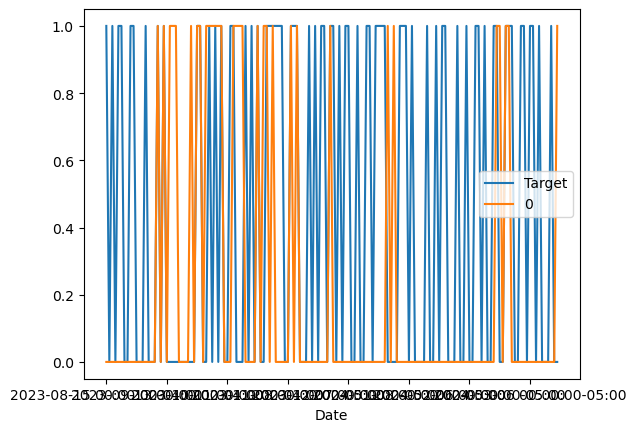

In [42]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [45]:
#Função para rodar no backtest

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [46]:
#Função de backtest
#Vai treinar por x anos e vai prever o ano seguinte
#começando com 10 anos, na sequencia vai treinar por 11 anos e prever 12 anos e assim vai

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [48]:
#Rodando Backtest
predictions = backtest(ambev, model, predictors)

In [49]:
predictions["Predictions"].value_counts()

0    1966
1    1625
Name: Predictions, dtype: int64

In [50]:
precision_score(predictions["Target"], predictions["Predictions"])

0.48123076923076924

In [51]:
#Percentual das vezes que acertamos  qnd ia cair ou subir

predictions["Target"].value_counts() / predictions.shape[0]

0    0.510443
1    0.489557
Name: Target, dtype: float64

In [53]:
#Criando Medidas comparativas
#ratio = valor de hoje dividido pela media do horizon
#Trend = numero de vezes que a ação subiu
#1000 ou 500?

horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = ambev.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    ambev[ratio_column] = ambev["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    ambev[trend_column] = ambev.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [54]:
ambev

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00-05:00,0.162678,0.162678,0.162678,0.162678,0,0.162678,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04 00:00:00-05:00,0.162678,0.162678,0.162678,0.162678,0,0.162678,0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05 00:00:00-05:00,0.162678,0.162678,0.162678,0.162678,0,0.162678,0,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06 00:00:00-05:00,0.162678,0.162678,0.162678,0.162678,0,0.162678,0,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07 00:00:00-05:00,0.162678,0.162678,0.162678,0.162678,0,0.162678,0,1.000000,0.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-13 00:00:00-04:00,2.560000,2.570000,2.520000,2.530000,14407700,2.520000,0,0.994106,1.0,0.992157,3.0,0.951405,29.0,0.942608,111.0,1.004381,464.0
2024-03-14 00:00:00-04:00,2.540000,2.550000,2.520000,2.520000,10962000,2.500000,0,0.998020,0.0,0.990566,2.0,0.948923,29.0,0.938957,110.0,1.000161,464.0
2024-03-15 00:00:00-04:00,2.520000,2.530000,2.490000,2.500000,13812000,2.510000,1,0.996016,0.0,0.987362,1.0,0.943177,28.0,0.931581,110.0,0.992022,463.0


In [55]:
#Resolvendo o problema do nan
#uma vez que as novas colunas precisam de valores previos, caso não exista valores suficientes e criado um valor NaN

ambev = ambev.dropna(subset=ambev.columns[ambev.columns != "Tomorrow"])

In [56]:
ambev

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2003-12-26 00:00:00-05:00,0.347645,0.347645,0.347645,0.347645,0,0.347645,0,1.000000,0.0,1.000000,0.0,1.016612,2.0,1.246966,14.0,1.319786,79.0
2003-12-29 00:00:00-05:00,0.347645,0.347645,0.347645,0.347645,0,0.347645,0,1.000000,0.0,1.000000,0.0,1.015353,2.0,1.244540,14.0,1.318860,79.0
2003-12-30 00:00:00-05:00,0.347645,0.347645,0.347645,0.347645,0,0.347645,0,1.000000,0.0,1.000000,0.0,1.014098,2.0,1.242124,14.0,1.317935,79.0
2003-12-31 00:00:00-05:00,0.347645,0.347645,0.347645,0.347645,0,0.347645,0,1.000000,0.0,1.000000,0.0,1.012845,2.0,1.239717,14.0,1.317012,79.0
2004-01-02 00:00:00-05:00,0.347645,0.347645,0.347645,0.347645,0,0.347645,0,1.000000,0.0,1.000000,0.0,1.011595,2.0,1.237320,14.0,1.316090,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-13 00:00:00-04:00,2.560000,2.570000,2.520000,2.530000,14407700,2.520000,0,0.994106,1.0,0.992157,3.0,0.951405,29.0,0.942608,111.0,1.004381,464.0
2024-03-14 00:00:00-04:00,2.540000,2.550000,2.520000,2.520000,10962000,2.500000,0,0.998020,0.0,0.990566,2.0,0.948923,29.0,0.938957,110.0,1.000161,464.0
2024-03-15 00:00:00-04:00,2.520000,2.530000,2.490000,2.500000,13812000,2.510000,1,0.996016,0.0,0.987362,1.0,0.943177,28.0,0.931581,110.0,0.992022,463.0


In [60]:
#Atualização no modelo
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [61]:
#Dando mais "segurança na decisão"

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [62]:
predictions = backtest(ambev, model, new_predictors)

In [63]:
predictions["Predictions"].value_counts()

0.0    2334
1.0     257
Name: Predictions, dtype: int64

In [64]:
precision_score(predictions["Target"], predictions["Predictions"])

0.490272373540856

In [65]:
predictions["Target"].value_counts() / predictions.shape[0]

0    0.52335
1    0.47665
Name: Target, dtype: float64

In [66]:
predictions

,Target,Predictions
Date,,
2013-12-02 00:00:00-05:00,0,1.0
2013-12-03 00:00:00-05:00,0,0.0
2013-12-04 00:00:00-05:00,1,1.0
2013-12-05 00:00:00-05:00,0,0.0
2013-12-06 00:00:00-05:00,1,0.0
...,...,...
2024-03-13 00:00:00-04:00,0,0.0
2024-03-14 00:00:00-04:00,0,0.0
2024-03-15 00:00:00-04:00,1,0.0
